##### Họ và tên: Nguyễn Thanh Trúc
#### STT: 20110342

#### LAB 08
#### Cài đặt gốc: Librosa
#### Download một đoạn nhạc .wov ngắn 30s ->1p
#### 1. Load file:dùng lệnh librosa.load chú ý option: momo False.Ont file. soundfule-> write 
#### 2. Xác định cấu trúc của mảng âm thanh đầu ra của lệnh biến
#### 3. Thực hiện tắt tiếng nổi biên tai nghe bằng cách lần lượt cho mỗi tọa độ = 0
#### 4. Xác định simple rate
#### 5. check lại

In [1]:
import sys
!{sys.executable} -m pip install librosa

In [50]:
import librosa as lb
import numpy as np
import cv2
import pandas as pd

In [51]:
sample,y = lb.load('2.wav', sr=None, mono=False, offset=0.0, duration=None, dtype=np.float32, res_type='kaiser_best')
sample ### câu 1

array([[-0.00424194, -0.00656128, -0.00598145, ..., -0.01596069,
        -0.02334595, -0.03057861],
       [ 0.00054932,  0.0010376 ,  0.00018311, ..., -0.0171814 ,
        -0.00973511, -0.00579834]], dtype=float32)

In [52]:
sample.shape

(2, 536474)

In [53]:
import soundfile as sf

In [54]:
data, samplerate = sf.read('2.wav') ### cau 1 dung sounfile

In [55]:
data

array([[-0.00424194,  0.00054932],
       [-0.00656128,  0.0010376 ],
       [-0.00598145,  0.00018311],
       ...,
       [-0.01596069, -0.0171814 ],
       [-0.02334595, -0.00973511],
       [-0.03057861, -0.00579834]])

In [56]:
samplerate ### xác định simple rate

16000

In [61]:
left = np.copy(data) ### left channel = 0
left [:,0] = 0
sf.write('right.wav', left, samplerate)

In [62]:
right = np.copy(data)### right channel = 0
right [:,1] = 0
sf.write('left.wav',left,samplerate)

In [59]:
right ### kiêm tra bên phải

array([[-0.00424194,  0.        ],
       [-0.00656128,  0.        ],
       [-0.00598145,  0.        ],
       ...,
       [-0.01596069,  0.        ],
       [-0.02334595,  0.        ],
       [-0.03057861,  0.        ]])

In [60]:
left ### kiem tra trái

array([[ 0.        ,  0.00054932],
       [ 0.        ,  0.0010376 ],
       [ 0.        ,  0.00018311],
       ...,
       [ 0.        , -0.0171814 ],
       [ 0.        , -0.00973511],
       [ 0.        , -0.00579834]])

#### Câu 6a: Tăng giảm âm lượng của tín hiệu bằng cách nhân(chia) ma trận biểu diễn tín hiệu với số thực dương

In [65]:
sample_left = left* 5 # ben trai tăng 5
sf.write('sample_left_5.wav', sample_left, samplerate)

In [66]:
sample_right = right* 5 # ben phai tang 5
sf.write('sample_right_5.wav', sample_right, samplerate)

#### Câu 6b: viết hàm chuẩn hóa tin hiệu theo thuật toán Program 97 trang 252

In [39]:
### bài mẫu trong sách
def normalize(sound): 
    largest = 0
    for s in getSamples(sound):
        largest = max(largest,getSampleValue(s) )
        multiplier = 32767.0 / largest
        print "Largest sample value in original sound was",largest
        print "Multiplier is", multiplier
        for s in getSamples(sound):
            louder = multiplier * getSampleValue(s)
            setSampleValue(s,louder)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Largest sample value in original sound was",largest)? (2039704060.py, line 6)

In [31]:
def normalize(sound): ### normalize
    largest = 0 
    for i in range(len(sound)):
        for j in range(len(sound[i])):
            largest = max(largest,sound[i,j])
    multiplier = 32767/largest
    print("largest sample",largest)
    print("mutiplier is",multiplier)

    for i in range(len(sound)):
        for j in range(len(sound[i])):
            sound[i,j] = multiplier *  sound[i,j]  
    return sound

In [32]:
normalize(sample)

largest sample 0.9498291
mutiplier is 34497.78486055777


array([[ -146.33765 ,  -226.3496  ,  -206.34662 , ...,  -550.6086  ,
         -805.3835  , -1054.8944  ],
       [   18.9502  ,    35.79482 ,     6.316733, ...,  -592.7201  ,
         -335.83963 ,  -200.02988 ]], dtype=float32)

#### câu 6c : Tính tự tương quan theo lệnh sau:

In [34]:
import librosa as lb

In [36]:
lb.autocorrelate(sample) ### autocorrelate

array([[ 1.42154895e+13,  1.38949528e+13,  1.36203954e+13, ...,
         4.80546883e+05,  3.56632845e+05,  1.54370765e+05],
       [ 1.45700357e+13,  1.43526010e+13,  1.42150084e+13, ...,
        -2.45170174e+04, -1.35242606e+04, -3.79060588e+03]])

#### Câu 6d: Tính zeros crossing theo lệnh sau

In [48]:
lb.zero_crossings(data) #### zeros crossing

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

#### Câu 6e Tính phổ biến của tính hiều bằng Short-time Fourrier transform

In [37]:
sample,y = lb.load('2.wav', sr=None, mono=False, offset=0.0, duration=5, dtype=np.float32, res_type='kaiser_best')
lb.stft(sample.T) ##### tinh phổ quan bằng short-time Fourier trànorm

D:\anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2
  return f(*args, **kwargs)


array([[[-0.00369263+0.0000000e+00j],
        [ 0.00369263+1.6852750e-06j],
        [-0.00369264-3.3705342e-06j],
        ...,
        [-0.00479125-3.3705342e-06j],
        [ 0.00479126+1.6852750e-06j],
        [-0.00479126+0.0000000e+00j]],

       [[-0.00552368+0.0000000e+00j],
        [ 0.00552369+3.1832972e-06j],
        [-0.0055237 -6.3665648e-06j],
        ...,
        [-0.00759886-6.3665648e-06j],
        [ 0.00759887+3.1832972e-06j],
        [-0.00759887+0.0000000e+00j]],

       [[-0.00579834+0.0000000e+00j],
        [ 0.00579834+5.6175833e-07j],
        [-0.00579834-1.1235114e-06j],
        ...,
        [-0.00616455-1.1235114e-06j],
        [ 0.00616455+5.6175833e-07j],
        [-0.00616455+0.0000000e+00j]],

       ...,

       [[ 0.07476801+0.0000000e+00j],
        [-0.07476792+6.4134074e-05j],
        [ 0.07476763-1.2826755e-04j],
        ...,
        [ 0.03295943-1.2826755e-04j],
        [-0.03295913+6.4134074e-05j],
        [ 0.03295903+0.0000000e+00j]],

       [[ 0.097

In [38]:
lb.istft(lb.stft(sample)) ### chuyển miền thời gian bằng STFT ngược

array([[-0.00424194, -0.00656128, -0.00598145, ...,  0.06890869,
         0.05880737,  0.05432129],
       [ 0.00054932,  0.0010376 ,  0.00018311, ...,  0.03900146,
         0.03713989,  0.03433228]], dtype=float32)

#### Câu 6.5a: Vẽ đồ thị từng channel âm thanh: tham khảo chương 2

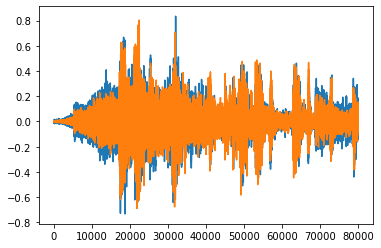

In [39]:
import matplotlib.pyplot as plt
plt.plot(sample[0])
plt.plot(sample[1])
plt.show()

#### Câu 6.5b: vẽ đồ thị biểu diễn phổ của tín hiệu theo lệnh

In [44]:
import librosa.display 

In [45]:
data_3 = lb.amplitude_to_db(lb.stft(sample.T), ref=np.max).reshape(80000, 1025)

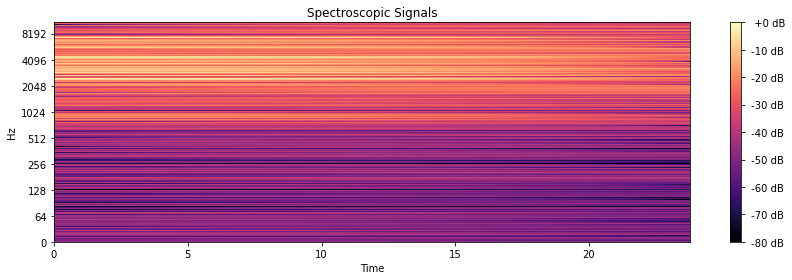

In [47]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(data_3, y_axis='log', x_axis='time')
plt.colorbar(format='%+4.0f dB')
plt.title('Spectroscopic Signals')
plt.tight_layout()
plt.show() #### dồ thị phổ quan theo tín hiệu